<b>Note: This is python 3 code using pandas. Not pyspark.</b>

In [1]:
import pandas as pd
import numpy as np

In [10]:
import datetime

In [17]:
from datetime import timedelta

# Original oil dataset

In [2]:
dfOil = pd.read_csv("oil.csv")

In [83]:
dfOil.head(20)

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20
5,2013-01-08,93.21
6,2013-01-09,93.08
7,2013-01-10,93.81
8,2013-01-11,93.60
9,2013-01-14,94.27


In [4]:
dfOil.dtypes

date           object
dcoilwtico    float64
dtype: object

In [49]:
dfOil.shape

(1218, 2)

In [75]:
dfOilSmall = dfOil[dfOil.date < '2016-01-01']

In [76]:
dfOilSmall.shape

(783, 2)

In [77]:
max(dfOilSmall.date)

'2015-12-31'

In [78]:
dfOilSmall[['date']] = dfOilSmall[['date']].astype('datetime64[ns]')

C:\Users\Rajesh\Anaconda3\lib\site-packages\pandas\core\frame.py:2352: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [79]:
dfOilSmall.dtypes

date          datetime64[ns]
dcoilwtico           float64
dtype: object

In [93]:
dfOilSmall.describe()

,dcoilwtico
count,756.000000
mean,79.937156
std,24.086449
min,34.550000
25%,52.755000
50%,93.240000
75%,99.690000
max,110.620000


# Generated dates

In [30]:
startDate = datetime.datetime(2013, 1, 1, 00, 00) 
startDate

datetime.datetime(2013, 1, 1, 0, 0)

In [31]:
nextDate = startDate + timedelta(days=1)
nextDate

datetime.datetime(2013, 1, 2, 0, 0)

In [32]:
nextDate - startDate

datetime.timedelta(1)

In [33]:
endDate = datetime.datetime(2015, 12, 31, 00, 00) 

In [34]:
totalDays = (endDate - startDate).days
totalDays

1094

In [35]:
dateList = []
for x in range (0, totalDays+1):
    dateList.append(startDate + datetime.timedelta(days = x))

In [36]:
dateList[0]

datetime.datetime(2013, 1, 1, 0, 0)

In [40]:
dateList[1094]

datetime.datetime(2015, 12, 31, 0, 0)

In [46]:
dfDateAll = pd.DataFrame({'date':dateList})

In [47]:
dfDateAll.shape

(1095, 1)

In [73]:
dfDateAll.dtypes

date    datetime64[ns]
dtype: object

In [62]:
dfDateAll.head()

,date
0,2013-01-01
1,2013-01-02
2,2013-01-03
3,2013-01-04
4,2013-01-05


# Merge

In [80]:
result = pd.merge(dfDateAll,
                 dfOilSmall[['date', 'dcoilwtico']],
                 on='date', how = 'left')

In [84]:
result.shape

(1095, 2)

In [85]:
result.head(22)

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-05,NaN
5,2013-01-06,NaN
6,2013-01-07,93.20
7,2013-01-08,93.21
8,2013-01-09,93.08
9,2013-01-10,93.81


In [98]:
result.tail(10)

,date,dcoilwtico
1085,2015-12-22,36.12
1086,2015-12-23,36.76
1087,2015-12-24,37.62
1088,2015-12-25,NaN
1089,2015-12-26,NaN
1090,2015-12-27,NaN
1091,2015-12-28,36.36
1092,2015-12-29,37.88
1093,2015-12-30,36.59
1094,2015-12-31,37.13


In [99]:
result.isnull().sum() 

date            0
dcoilwtico    339
dtype: int64

# Check interpolation sample and do the interpolation

In [88]:
s = pd.Series([0, 1, np.nan, 3, 5, 7, 9, 34, np.nan, 25, np.nan, np.nan, 20])

In [89]:
s.interpolate()

0      0.000000
1      1.000000
2      2.000000
3      3.000000
4      5.000000
5      7.000000
6      9.000000
7     34.000000
8     29.500000
9     25.000000
10    23.333333
11    21.666667
12    20.000000
dtype: float64

In [91]:
%matplotlib inline

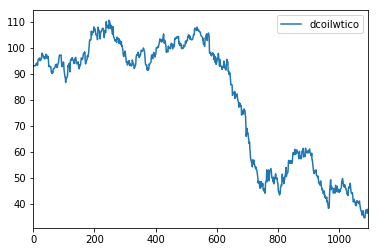

In [92]:
result.interpolate().plot()

In [96]:
result2 = result.interpolate()

In [97]:
result2.head(22)

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.140000
2,2013-01-03,92.970000
3,2013-01-04,93.120000
4,2013-01-05,93.146667
5,2013-01-06,93.173333
6,2013-01-07,93.200000
7,2013-01-08,93.210000
8,2013-01-09,93.080000
9,2013-01-10,93.810000


In [104]:
result2.isnull().sum() 

date          0
dcoilwtico    1
dtype: int64

In [116]:
result2.loc[result2.index == 0, 'dcoilwtico'] = 93.140000

In [119]:
result2.head(10)

,date,dcoilwtico
0,2013-01-01,93.140000
1,2013-01-02,93.140000
2,2013-01-03,92.970000
3,2013-01-04,93.120000
4,2013-01-05,93.146667
5,2013-01-06,93.173333
6,2013-01-07,93.200000
7,2013-01-08,93.210000
8,2013-01-09,93.080000
9,2013-01-10,93.810000


In [120]:
result2.to_csv("oil_2013_2015_interpolated.csv", index = False)